In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [41]:
cric=pd.read_csv('/content/bat.csv')
cric

,Player,Team,Type,M,Inn,NO,Runs,HS,Avg,BF,SR,4s,6s,50,100,200
0,Virat Kohli,India,IPL,192,184,30,5878,113,38.17,4496,130.74,503,201,39,5,0
1,Rohit Sharma,India,IPL,200,195,28,5230,109,31.32,4004,130.62,458,213,39,1,0
2,Shikhar Dhawan,India,IPL,176,175,23,5196,106,34.18,4096,126.86,591,108,41,2,0
3,Shubman Gill,India,IPL,41,38,10,939,76,33.54,750,125.20,87,24,7,0,0
4,Shreyas Iyer,India,IPL,79,79,9,2200,96,31.43,1745,126.07,189,83,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Aftab Alam,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
820,Dawlat Zadran,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
821,Hamid Hassan,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
822,Rashid Khan,Afghanistan,Test,4,7,0,106,51,15.14,133,79.70,11,4,1,0,0


In [43]:
cric.columns

Index(['Player', 'Team', 'Type', 'M', 'Inn', 'NO', 'Runs', 'HS', 'Avg', 'BF',
       'SR', '4s', '6s', '50', '100', '200'],
      dtype='object')

In [42]:
df=pd.DataFrame({'Player':cric['Player'],'Team':cric['Team'],'Type':cric['Type'],'M':cric['M'],'Inn':cric['Inn'],})
df['Avg']=cric['Avg']
df

,Player,Team,Type,M,Inn,Avg
0,Virat Kohli,India,IPL,192,184,38.17
1,Rohit Sharma,India,IPL,200,195,31.32
2,Shikhar Dhawan,India,IPL,176,175,34.18
3,Shubman Gill,India,IPL,41,38,33.54
4,Shreyas Iyer,India,IPL,79,79,31.43
...,...,...,...,...,...,...
819,Aftab Alam,Afghanistan,Test,0,0,0.00
820,Dawlat Zadran,Afghanistan,Test,0,0,0.00
821,Hamid Hassan,Afghanistan,Test,0,0,0.00
822,Rashid Khan,Afghanistan,Test,4,7,15.14


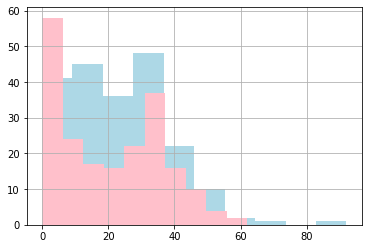

In [6]:
members=df.loc[df['Type']=='Test']
memberstot=members['Avg']
normal=df.loc[df['Type']=='ODI']
normaltot=normal['Avg']
normaltot.hist(color='lightblue')
memberstot.hist(color='pink')

# Hypotheisis



## H0: Test and ODI  Avg Averages are same.

##H1:  Test  Averages are less than ODI averages.


In [7]:
df.groupby('Type').mean()

,M,Inn,Avg
Type,,,
IPL,24.218447,18.116505,9.187864
ODI,70.199029,57.383495,23.763932
T20,32.092233,24.203883,16.526553
Test,21.024272,35.383495,20.503155


In [8]:
means=df.groupby('Type').mean()

In [10]:
difference=means['Avg'][0]-means['Avg'][1]
observed_difference=difference
observed_difference

-14.576067961165048

Generating Random permutations

In [11]:
df.iloc[143]

Player    Kemar Roach
Team      West-Indies
Type              IPL
M                   2
Inn                 1
Avg              10.0
Name: 143, dtype: object

In [17]:
randomsamples=df.sample(824,replace=False)
randomsamples

,Player,Team,Type,M,Inn,Avg
39,Andy McBrine,Ireland,IPL,0,0,0.00
663,Asif Ali,Pakistan,Test,0,0,0.00
528,Moeen Ali,England,T20,34,31,17.04
245,Andy McBrine,Ireland,ODI,48,30,18.00
302,Nuwan Pradeep,Sri-Lanka,ODI,45,23,4.14
...,...,...,...,...,...,...
137,Andre Russell,West-Indies,IPL,74,61,29.75
13,Ravichandran Ashwin,India,IPL,154,58,10.84
489,Sean Abbott,Australia,T20,7,2,17.00
606,Najibullah Zadran,Afghanistan,T20,60,51,31.48


In [14]:
randomsamples['Avg']

193     0.00
35      0.00
536    17.00
476     0.00
771    24.71
       ...  
389    27.18
444    14.91
508    10.00
3      33.54
140    32.56
Name: Avg, Length: 100, dtype: float64

In [15]:
original_shuffled=df.copy()
original_shuffled

,Player,Team,Type,M,Inn,Avg
0,Virat Kohli,India,IPL,192,184,38.17
1,Rohit Sharma,India,IPL,200,195,31.32
2,Shikhar Dhawan,India,IPL,176,175,34.18
3,Shubman Gill,India,IPL,41,38,33.54
4,Shreyas Iyer,India,IPL,79,79,31.43
...,...,...,...,...,...,...
819,Aftab Alam,Afghanistan,Test,0,0,0.00
820,Dawlat Zadran,Afghanistan,Test,0,0,0.00
821,Hamid Hassan,Afghanistan,Test,0,0,0.00
822,Rashid Khan,Afghanistan,Test,4,7,15.14


In [18]:
original_shuffled['shuffled']=randomsamples['Avg'].values
original_shuffled

,Player,Team,Type,M,Inn,Avg,shuffled
0,Virat Kohli,India,IPL,192,184,38.17,0.00
1,Rohit Sharma,India,IPL,200,195,31.32,0.00
2,Shikhar Dhawan,India,IPL,176,175,34.18,17.04
3,Shubman Gill,India,IPL,41,38,33.54,18.00
4,Shreyas Iyer,India,IPL,79,79,31.43,4.14
...,...,...,...,...,...,...,...
819,Aftab Alam,Afghanistan,Test,0,0,0.00,29.75
820,Dawlat Zadran,Afghanistan,Test,0,0,0.00,10.84
821,Hamid Hassan,Afghanistan,Test,0,0,0.00,17.00
822,Rashid Khan,Afghanistan,Test,4,7,15.14,31.48


In [19]:
original_shuffled.columns

Index(['Player', 'Team', 'Type', 'M', 'Inn', 'Avg', 'shuffled'], dtype='object')

In [20]:
original_shuffled.drop(['Team', 'Type', 'Inn','Avg'], axis=1,inplace=True)

In [21]:
original_shuffled

,Player,M,shuffled
0,Virat Kohli,192,0.00
1,Rohit Sharma,200,0.00
2,Shikhar Dhawan,176,17.04
3,Shubman Gill,41,18.00
4,Shreyas Iyer,79,4.14
...,...,...,...
819,Aftab Alam,0,29.75
820,Dawlat Zadran,0,10.84
821,Hamid Hassan,0,17.00
822,Rashid Khan,4,31.48


In [24]:
group_means= original_shuffled.groupby('Player').mean()
group_means

,M,shuffled
Player,,
Aaron Finch,72.50,13.3750
Abu Jayed,3.50,17.4250
Adam Zampa,27.75,24.1725
Adil Rashid,44.00,20.4700
Aftab Alam,10.00,23.4875
...,...,...
Wahab Riaz,38.50,9.3700
Will Pucovski,0.25,16.0150
William Porterfield,50.50,17.1875


In [25]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

-4.050000000000001

In [35]:
original = sales[['Type', 'Avg']]
shuffled = original.sample(824,replace = False)
shuffled_avg = shuffled['Avg']
original_shuffled = original.assign(shuffled_avg=shuffled_avg.values )
group_means= original_shuffled.groupby('Type').mean()
group_means

,Avg,shuffled_avg
Type,,
IPL,9.187864,18.153689
ODI,23.763932,17.907282
T20,16.526553,17.095049
Test,20.503155,16.825485


Simulating multiple samples

In [37]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = sales[['Type', 'Avg']]
    shuffled = original.sample(824,replace = False)
    shuffled_avg = shuffled['Avg']
    original_shuffled = original.assign(shuffled_avg=shuffled_avg.values )
    group_means= original_shuffled.groupby('Type').mean()
    difference = group_means['shuffled_avg'][0]- group_means['shuffled_avg'][1]
    differences[i] = difference

In [38]:
differences_df=pd.DataFrame(differences)
differences_df

,0
0,1.379320
1,-0.520097
2,1.583544
3,0.846699
4,-0.344903
...,...
4995,-0.173835
4996,-0.663981
4997,1.512670
4998,1.003544


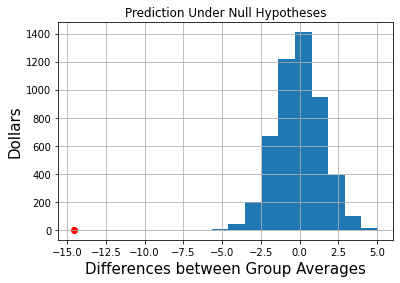

In [39]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

## The Observed diffence lies within the sample difference histogram.

In [40]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

## Emperical value is not grater than p value is 0.05.hence we can reject the null hypotheisis.